In [1]:
import pandas as pd
import matplotlib.pyplot as plt

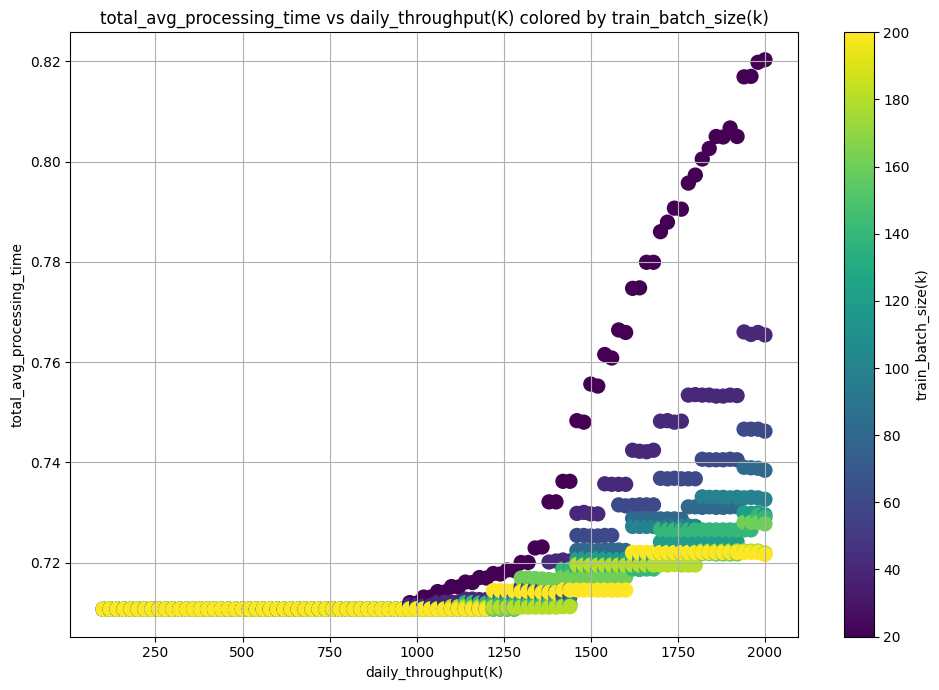

In [2]:
file_path = "npf_performance_results.xlsx"
df = pd.read_excel(file_path)

x = 'daily_throughput(K)'             # x-axis
y = 'train_batch_size(k)'             # group variable
z = 'total_avg_processing_time'       # y-axis
# y = 'num_trains'                  # group variable

if all(col in df.columns for col in [x, y, z]):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(df[x], df[z], c=df[y], cmap='viridis', s=100)
    plt.xlabel(x)
    plt.ylabel(z)
    plt.title(f'{z} vs {x} colored by {y}')
    plt.colorbar(scatter, label=y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    missing = [col for col in [x, y, z] if col not in df.columns]
    print(f"Missing columns: {missing}")

                           daily_throughput(K)  train_batch_size(k)  \
daily_throughput(K)               1.000000e+00         4.072057e-16   
train_batch_size(k)               4.072057e-16         1.000000e+00   
num_trains                        4.635885e-01        -6.320450e-01   
M                                          NaN                  NaN   
N                                 2.804656e-15         5.918640e-01   
n_t                                        NaN                  NaN   
n_p                                        NaN                  NaN   
n_r                               2.252049e-16         9.023291e-01   
crane_numbers                              NaN                  NaN   
hostler_numbers                            NaN                  NaN   
total_avg_processing_time         5.806204e-01        -3.129040e-01   

                           num_trains   M             N  n_t  n_p  \
daily_throughput(K)          0.463589 NaN  2.804656e-15  NaN  NaN   
train_bat

/Users/qianqiantong/PycharmProjects/altrios-private/altrios-venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


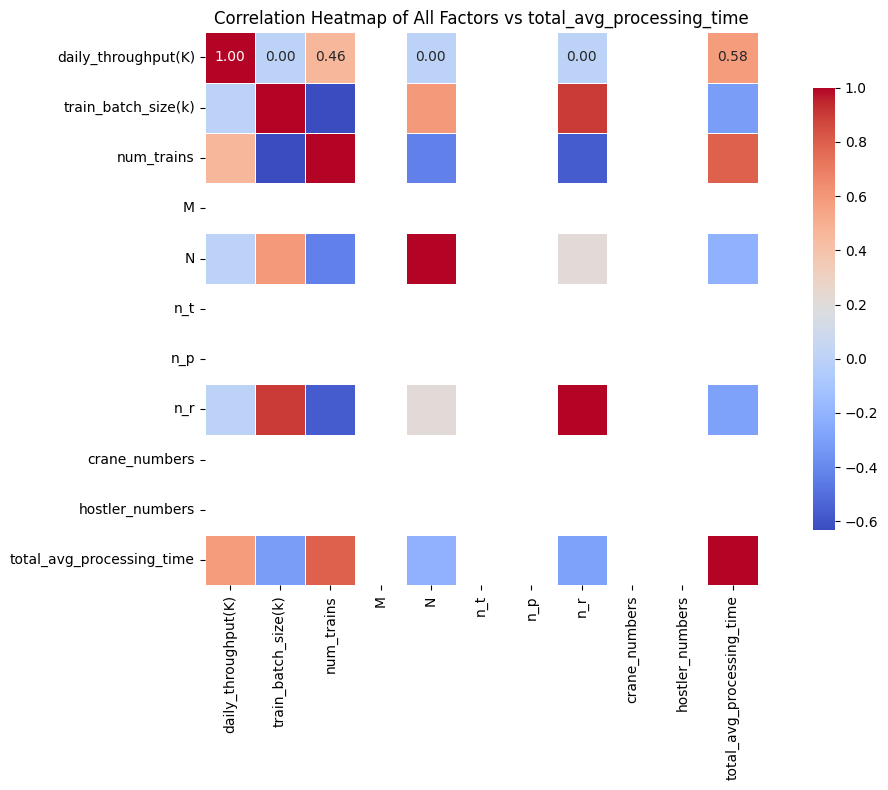

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("npf_performance_results.xlsx")

features = [
    'daily_throughput(K)', 'train_batch_size(k)', 'num_trains',
    'M', 'N', 'n_t', 'n_p', 'n_r', 'crane_numbers', 'hostler_numbers',
    'total_avg_processing_time'
]

available_features = [col for col in features if col in df.columns]
df_selected = df[available_features]

corr_matrix = df_selected.corr()
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of All Factors vs total_avg_processing_time")
plt.tight_layout()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# impact factors
features = [
    'daily_throughput(K)',
    'train_batch_size(k)',
    'num_trains',
]

X = df[features]
y = np.log(df['total_avg_processing_time'])

model = LinearRegression()
model.fit(X, y)

print("ln(y) = ", model.intercept_, "+", " + ".join([f"{coef:.4f}*{name}" for coef, name in zip(model.coef_, features)]))


ln(y) =  -0.36411527062184973 + 0.0000*daily_throughput(K) + 0.0001*train_batch_size(k) + 0.0020*num_trains


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

features = [
    'daily_throughput(K)',
    'train_batch_size(k)',
    'num_trains',
]

X = df[features]
y = np.log(df['total_avg_processing_time'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

print("Regression Equation:")
print(f"ln(y) = {model.intercept_:.4f} + " + " + ".join(
    [f"{coef:.4f}*{name}" for coef, name in zip(model.coef_, features)]
))


Regression Equation:
ln(y) = -0.3317 + 0.0042*daily_throughput(K) + 0.0045*train_batch_size(k) + 0.0172*num_trains


In [13]:
y_pred = model.predict(X_scaled)
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (log-space): {mse:.6f}")

Mean Squared Error (log-space): 0.000119
